<a href="https://colab.research.google.com/github/minsung6333/AIFFEL_Quest/blob/main/exp_quest_1/aiffel_quest_exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.
새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.

데이터는 `sklearn.datasets`에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.
데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!

- [회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀](https://yhyun225.tistory.com/11)

다음 과정을 차례대로 진행해주세요!

# (1) 데이터 가져오기
---
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [ ]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [ ]:
df_X=diabetes.data
df_y=diabetes.target

# (2) 모델에 입력할 데이터 X 준비하기
---
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

# (3) 모델에 예측할 데이터 Y 준비하기
---
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [ ]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# (4) train 데이터와 test 데이터로 분리하기
---
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


# (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(X_train.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# (6) 손실함수 loss 정의하기
---
- 손실함수를 mse 함수로 정의해주세요

In [ ]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

슝=3


# (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요

In [ ]:
#각각의 변수에 대한 편미분
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

슝=3


In [ ]:
dW, db = gradient(X_train, W, b, y_train)
dW, db

(array([-1.85179559, -0.1032177 , -4.97435941, -3.7087863 , -1.30573017,
        -0.89369526,  3.1109158 , -3.26937918, -4.47577848, -3.51260316]),
 -306.53655237230555)

# (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [ ]:
LEARNING_RATE = 1

# (9) 모델 학습하기
---
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [ ]:
# 학습 과정은 위에서와 완전히 똑같습니다. gradient를 구하고, W와 b를 업데이트하고, 손실함수를 기록합니다.
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3326.5995
Iteration 20 : Loss 3282.7779
Iteration 30 : Loss 3244.6323
Iteration 40 : Loss 3211.1523
Iteration 50 : Loss 3181.5649
Iteration 60 : Loss 3155.2697
Iteration 70 : Loss 3131.7923
Iteration 80 : Loss 3110.7517
Iteration 90 : Loss 3091.8370
Iteration 100 : Loss 3074.7907
Iteration 110 : Loss 3059.3963
Iteration 120 : Loss 3045.4698
Iteration 130 : Loss 3032.8529
Iteration 140 : Loss 3021.4083
Iteration 150 : Loss 3011.0159
Iteration 160 : Loss 3001.5700
Iteration 170 : Loss 2992.9770
Iteration 180 : Loss 2985.1539
Iteration 190 : Loss 2978.0265
Iteration 200 : Loss 2971.5284
Iteration 210 : Loss 2965.6003
Iteration 220 : Loss 2960.1886
Iteration 230 : Loss 2955.2454
Iteration 240 : Loss 2950.7274
Iteration 250 : Loss 2946.5955
Iteration 260 : Loss 2942.8144
Iteration 270 : Loss 2939.3523
Iteration 280 : Loss 2936.1804
Iteration 290 : Loss 2933.2727
Iteration 300 : Loss 2930.6055
Iteration 310 : Loss 2928.1574
Iteration 320 : Loss 2925.9092
Iteration 330 : L

# (10) test 데이터에 대한 성능 확인하기
---
- test 데이터에 대한 성능을 확인해주세요.

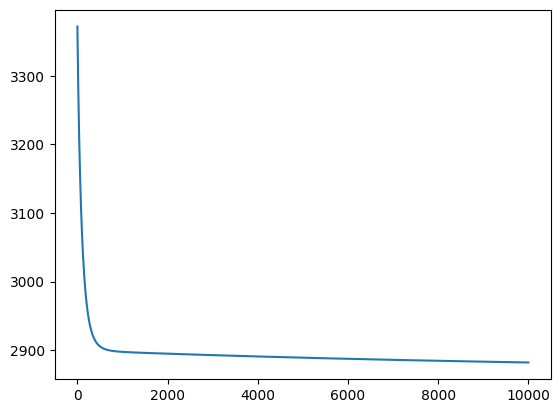

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [ ]:
W, b

(array([  41.09368709, -240.76533957,  553.46165906,  344.20728104,
        -362.33472781,   71.7725172 ,  -92.14959882,  196.4014737 ,
         518.20062155,   52.73466233]),
 151.31658688093012)

In [ ]:
# 그렇다면 X_test 데이터와 y_test 데이터에 대해서도 역시 예측을 해 보겠습니다.
# 학습때 보지 않은 test 데이터에 대해서는 loss값이 얼마나 될까요?
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.8041968453026

# (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

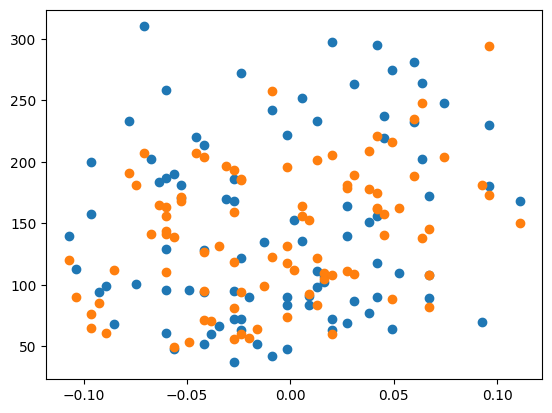

In [ ]:
plt.scatter(X_test[:, 0], y_test, label = 'true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.show()

# 회고
- 학습률의 경우 5가지(0.001, 0.01, 0.1, 0.5, 1)로 epoch는 3가지 (100, 1000, 10000) 횟수로 학습을 진행함. 0.001로 10000회 이상 학습을 진행했을 경우 줄어드는 loss가 미미 했기에 단계를 걸쳐 1로 10000회 학습을 진행하여 loss값을 2900미만으로 달성.
- 위 과정은 학습진행간 큰 시간소요가 되지 않기에 다양한 숫자를 대입하여 진행이 가능하였지만 시간소요가 큰 경우 위와같은 실험적인 학습을 진행하는데 어려움이 있을 것으로 우려됨.
- https://velog.io/@qsdcfd/%EC%B5%9C%EC%A0%81%ED%99%94 최적화 관련 추가적인 학습을 찾아보고 이를 추후 프로젝트에서 적용하고자 함
